First few rows of the data:
           Country Name Country Code_x     MPA  \
0                Angola            AGO   0.005   
1               Albania            ALB   2.839   
2  United Arab Emirates            ARE  11.270   
3             Argentina            ARG  11.768   
4   Antigua and Barbuda            ATG   0.182   

   Share of global plastics emitted to ocean  FisheryConsumption  
0                                   0.087804           401696.00  
1                                   0.159782            15011.50  
2                                   0.001429            75357.00  
3                                   0.422376           828687.19  
4                                   0.000204             3185.00  

Data types of the columns:
Country Name                                  object
Country Code_x                                object
MPA                                          float64
Share of global plastics emitted to ocean    float64
FisheryConsumption           

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

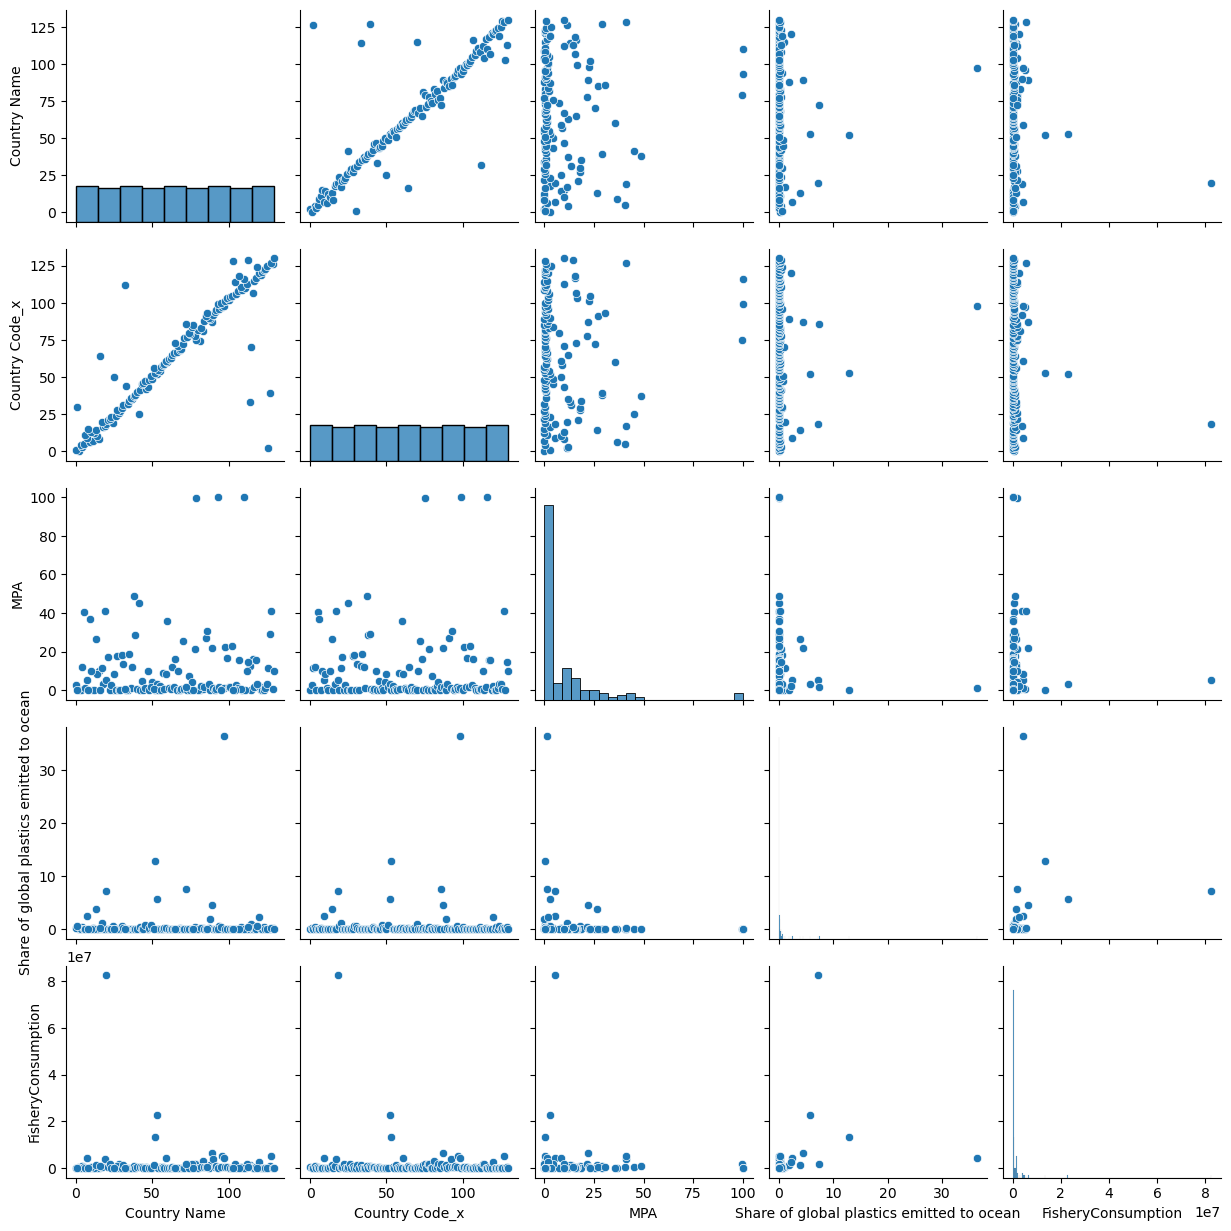

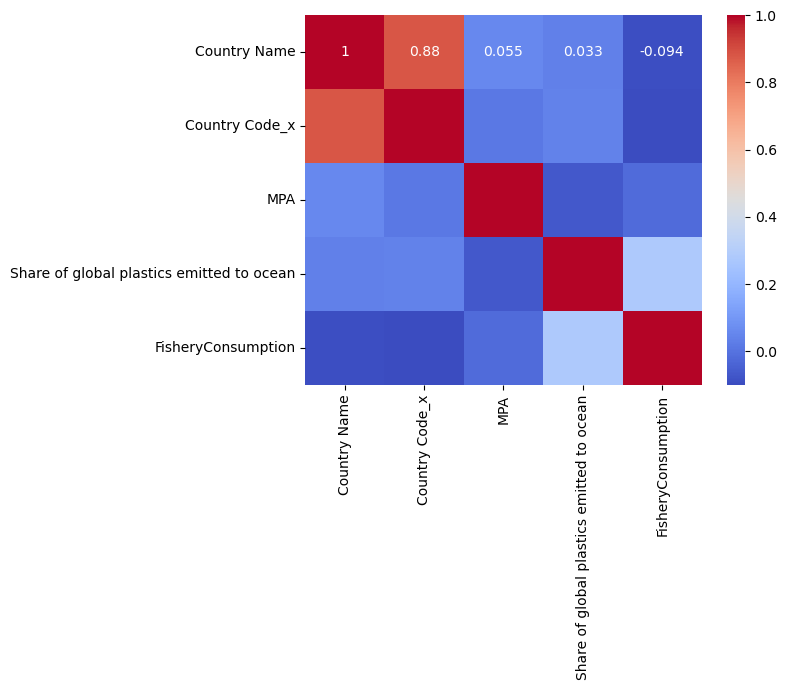

Pearson Correlations:
MPA and Share of global plastics emitted to ocean: PearsonRResult(statistic=-0.06840483003712709, pvalue=0.43755103000204026)
MPA and FisheryConsumption: PearsonRResult(statistic=-0.021933638588902297, pvalue=0.8036192573294101)
Share of global plastics emitted to ocean and FisheryConsumption: PearsonRResult(statistic=0.2812117126015733, pvalue=0.0011391842559812014)

Spearman Correlations:
MPA and Share of global plastics emitted to ocean: SignificanceResult(statistic=-0.04174390718394027, pvalue=0.635921993802224)
MPA and FisheryConsumption: SignificanceResult(statistic=0.20239415641574207, pvalue=0.02043016338159709)
Share of global plastics emitted to ocean and FisheryConsumption: SignificanceResult(statistic=0.3436251006786394, pvalue=5.860981054430181e-05)


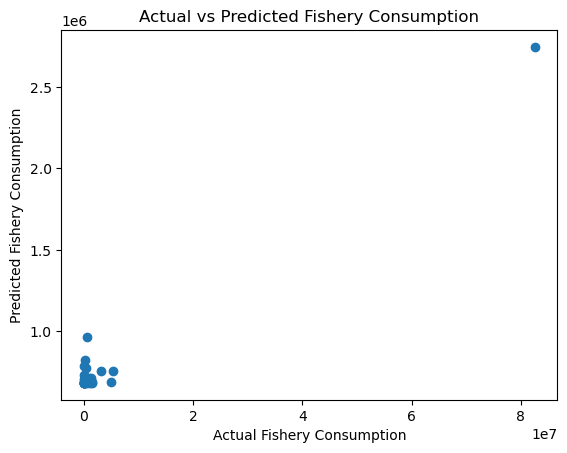

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data from the uploaded CSV file
file_path = 'input.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data
print("First few rows of the data:")
print(df.head())

# Check the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Identify non-numeric columns and apply Label Encoding if needed
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Display the encoded data
print("\nEncoded Data:")
print(df.head())

# Check for and handle missing values if necessary
df = df.dropna()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Scatter Plots
sns.pairplot(df)
plt.show()

# Heatmap of Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pearson Correlation Coefficient
pearson_corr_mpa_plastics = pearsonr(df['MPA'], df['Share of global plastics emitted to ocean'])
pearson_corr_mpa_fishery = pearsonr(df['MPA'], df['FisheryConsumption'])
pearson_corr_plastics_fishery = pearsonr(df['Share of global plastics emitted to ocean'], df['FisheryConsumption'])

# Spearman's Rank Correlation
spearman_corr_mpa_plastics = spearmanr(df['MPA'], df['Share of global plastics emitted to ocean'])
spearman_corr_mpa_fishery = spearmanr(df['MPA'], df['FisheryConsumption'])
spearman_corr_plastics_fishery = spearmanr(df['Share of global plastics emitted to ocean'], df['FisheryConsumption'])

print("Pearson Correlations:")
print(f"MPA and Share of global plastics emitted to ocean: {pearson_corr_mpa_plastics}")
print(f"MPA and FisheryConsumption: {pearson_corr_mpa_fishery}")
print(f"Share of global plastics emitted to ocean and FisheryConsumption: {pearson_corr_plastics_fishery}")

print("\nSpearman Correlations:")
print(f"MPA and Share of global plastics emitted to ocean: {spearman_corr_mpa_plastics}")
print(f"MPA and FisheryConsumption: {spearman_corr_mpa_fishery}")
print(f"Share of global plastics emitted to ocean and FisheryConsumption: {spearman_corr_plastics_fishery}")

# Simple Linear Regression
X = df[['Share of global plastics emitted to ocean']]
y = df['FisheryConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fishery Consumption')
plt.ylabel('Predicted Fishery Consumption')
plt.title('Actual vs Predicted Fishery Consumption')
plt.show()


                               OLS Regression Results                              
Dep. Variable:     Log_Fishery_Consumption   R-squared:                       0.265
Model:                                 OLS   Adj. R-squared:                  0.242
Method:                      Least Squares   F-statistic:                     11.36
Date:                     Wed, 31 Jul 2024   Prob (F-statistic):           6.60e-08
Time:                             12:05:07   Log-Likelihood:                -275.06
No. Observations:                      131   AIC:                             560.1
Df Residuals:                          126   BIC:                             574.5
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


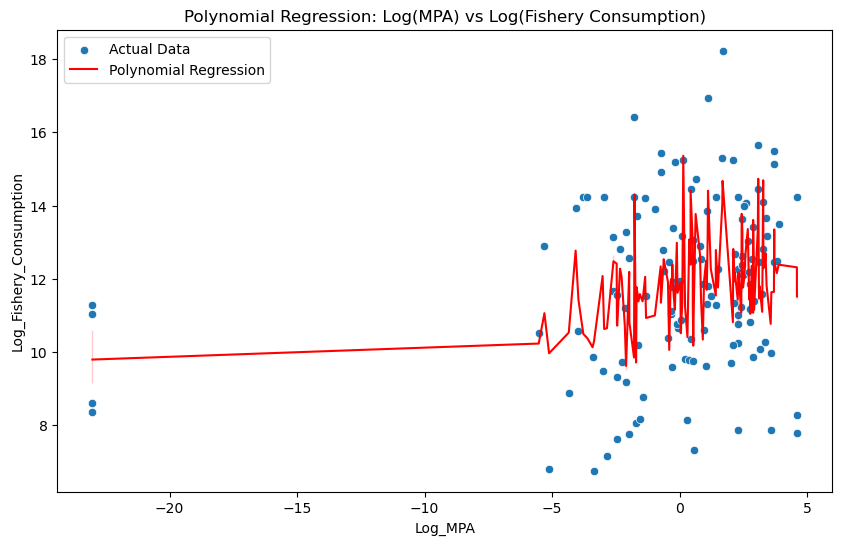

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'input.csv'
data = pd.read_csv(file_path)

# Apply log transformation with small constant to handle zero values
data['Log_MPA'] = np.log(data['MPA'] + 1e-10)
data['Log_Fishery_Consumption'] = np.log(data['FisheryConsumption'] + 1e-10)
data['Log_Share_Plastic_Pollution'] = np.log(data['Share of global plastics emitted to ocean'] + 1e-10)

# Prepare polynomial features (degree 2 for this example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['Log_MPA', 'Log_Share_Plastic_Pollution']])

# Remove the interaction term (x4)
X_poly_reduced = np.delete(X_poly, 3, axis=1)  # Remove the 4th column which is the interaction term

# Add a constant to the polynomial features
X_poly_reduced = sm.add_constant(X_poly_reduced)

# Fit the OLS model on the polynomial features
model_poly_reduced = sm.OLS(data['Log_Fishery_Consumption'], X_poly_reduced).fit()

# Print the regression results
print(model_poly_reduced.summary())

# Make predictions
data['Predicted_Log_Fishery_Consumption'] = model_poly_reduced.predict(X_poly_reduced)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Log_MPA'], y=data['Log_Fishery_Consumption'], label='Actual Data')
sns.lineplot(x=data['Log_MPA'], y=data['Predicted_Log_Fishery_Consumption'], color='red', label='Polynomial Regression')
plt.xlabel('Log_MPA')
plt.ylabel('Log_Fishery_Consumption')
plt.title('Polynomial Regression: Log(MPA) vs Log(Fishery Consumption)')
plt.legend()
plt.show()
